In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv(r'aps_failure_training_set1.csv',na_values="na")

In [4]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,119358,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,729802.0,332758.0,735544.0,933684.0,970802.0,819800.0,603068.0,44368.0,0.0,0.0
1,neg,1332,NaN,3.800000e+01,34.0,0.0,0.0,0.0,0.0,0.0,...,2250.0,846.0,5126.0,52226.0,16.0,0.0,0.0,0.0,0.0,0.0
2,neg,28,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,618.0,56.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,neg,680,4.0,2.130706e+09,68.0,0.0,0.0,0.0,0.0,0.0,...,3654.0,1260.0,2596.0,2352.0,5542.0,10738.0,54.0,0.0,0.0,0.0
4,neg,2060,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,7774.0,3158.0,10076.0,73650.0,242.0,12.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9042,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
9043,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
9044,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
9045,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [4]:
df.shape

(9047, 171)

In [5]:
df['class'].value_counts()

class
neg    8913
pos     134
Name: count, dtype: int64

In [6]:
#we are categorizing data in tabular forms and differentiating it in class and numerical features

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [7]:
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 170 numerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000'

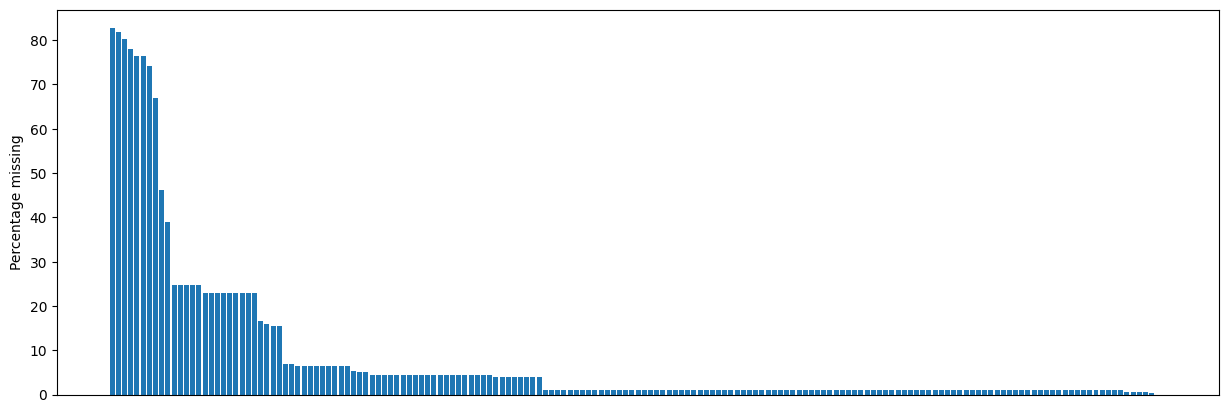

In [8]:
#checking missing values

fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [9]:
#drop columns containg more than 70% missing values

dropcols = missing[missing[0]>70]
dropcols

,0
br_000,82.712501
bq_000,81.739803
bp_000,80.081795
bo_000,77.849011
ab_000,76.345750
cr_000,76.345750
bn_000,74.101912


In [10]:
df.drop(list(dropcols.index),axis=1,inplace=True)

In [11]:
#now check shape of the data
df.shape

(9047, 164)

In [12]:
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

#Now check the percentage of the missing data

print(f"Percentage of total missing cells in the data {(total_missing/total_cells) * 100}%")


Percentage of total missing cells in the data 5.201562571611126%


Positive: 134, Negative: 8913


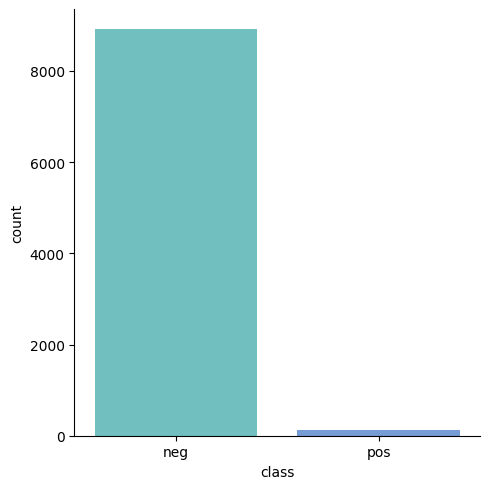

In [13]:
#here we are visualizing unique values and differentiating neg and pos

pos = df[df['class']=='pos'].shape[0]
neg = df[df['class']=='neg'].shape[0]
print("Positive: " + str(pos) + ", Negative: " +str(neg))
sns.catplot(data=df, x="class", kind= "count", palette = "winter_r", alpha=.6)
plt.show()

In [14]:
def evaluate_clf(true, predicted):
    '''This function is used in returning Accuracy , F1-score,Precision,Recall ,Roc-auc Score 
    using true values and predicted values'''
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true,predicted)
    roc_auc = roc_auc_score(true, predicted)
    return acc,f1,precision,recall,roc_auc

In [15]:
def total_cost(y_true,y_pred):
    ''' 
    This function takes y_ture, y_predicted and prints total cost due to missclassification
    '''
    tn,fp,fn,tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp+500*fn
    return cost

In [16]:
def evaluate_models(X,y,models):
    '''This function takes in X and y and models
    dictionary as input . Its splits the data into Train
    test split . Iterates through the given model dictionary and evalutes the metrics
    Returns: Dataframe which contains report of all models metrics with cost'''
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list = []
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) #Train model
        
        #Make predictions
        
        y_train_pred = model.predict(X_train)
        
        y_test_pred = model.predict(X_test)
        
        # Training Set performance
        model_train_accuracy,model_train_f1,model_train_precision,\
        model_test_recall,model_train_rocauc_score=evaluate_clf(y_test,y_test_pred)
        train_cost = total_cost(y_test, y_test_pred)
        
        #Testing set performance
        model_test_accuracy, model_test_f1, model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_train , y_train_pred)
        test_cost=total_cost(y_train,y_train_pred)
        
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print("- F1 score: {:.4f}".format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_rocauc_score))
        print(f'-COST: {train_cost}.')
        
        print('--------------------')
        
        print('Model performance for Test set')
        print('-Accuracy: {:.4f}'.format(model_test_accuracy))
        print('-F1 score : {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('-Recall: {:.4f}'.format(model_test_recall))
        print('- ROC Auc Score : {:.4f}'.format(model_test_rocauc_score))
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
    report = pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name ', 'Cost']).sort_values(by=["Cost"])
    return report

In [17]:
#Splitting x and y for all Experiments
X = df.drop('class', axis=1)
y = df['class']

In [18]:
y = y.replace({'pos':1,'neg':0})

In [19]:
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [21]:
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.6944)
n_neighbors= 3 || accuracy (0.7086)
n_neighbors= 5 || accuracy (0.7101)
n_neighbors= 7 || accuracy (0.7008)
n_neighbors= 9 || accuracy (0.6812)


In [20]:
num_features = X.select_dtypes(exclude="object").columns
#combine KNN imputer with selected k-value
knn_pipeline = Pipeline(
    steps=[
        ('imputer',KNNImputer(n_neighbors=3)),
        ('RobustScaler', RobustScaler())
    ]
)

In [21]:
x_knn = knn_pipeline.fit_transform(X)

In [22]:
from imblearn.combine import SMOTETomek

#Resampling these minority class can help in creating strategy that can be changed as required
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
#Fit this model in order to generate the data
X_res, y_res = smt.fit_resample(x_knn,y)

In [23]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [41]:
report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9921
- F1 score: 0.9922
- Precision: 0.9882
- Recall: 0.9921
-COST: 14340.
--------------------
Model performance for Test set
-Accuracy: 1.0000
-F1 score : 1.0000
- Precision: 1.0000
-Recall: 1.0000
- ROC Auc Score : 1.0000


Decision Tree
Model performance for Training set
- Accuracy: 0.9857
- F1 score: 0.9858
- Precision: 0.9818
- Recall: 0.9856
-COST: 36800.
--------------------
Model performance for Test set
-Accuracy: 1.0000
-F1 score : 1.0000
- Precision: 1.0000
-Recall: 1.0000
- ROC Auc Score : 1.0000


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9819
- F1 score: 0.9821
- Precision: 0.9790
- Recall: 0.9819
-COST: 53990.
--------------------
Model performance for Test set
-Accuracy: 0.9838
-F1 score : 0.9838
- Precision: 0.9814
-Recall: 0.9862
- ROC Auc Score : 0.9838


Logistic Regression
Model performance for Training set
- Accuracy: 0.5855
- F1 score: 0.6924
- Precision: 0.5529
- Recall: 0.5

In [43]:
report_knn

,Model Name,Cost
0,Random Forest,0
1,Decision Tree,0
5,XGBClassifier,10
6,CatBoosting Classifier,8720
4,K-Neighbors Classifier,134410
2,Gradient Boosting,198730
7,AdaBoost Classifier,389070
3,Logistic Regression,1257200


In [24]:
num_features = X.select_dtypes(exclude="object").columns

#Fitting this simple imputer with strategy median
median_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('RobustScaler',RobustScaler())
    ]
)

In [25]:
#Fit X with median_pipeline
X_median = median_pipeline.fit_transform(X)

In [26]:
#Resampling this minority class . the strategy can be changed as per requirements
smt = SMOTETomek(random_state = 42, sampling_strategy='minority')
#Fit the model to generate the data
X_res, y_res = smt.fit_resample(X_median, y)

In [47]:
#Now Train these models
report_median = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9914
- F1 score: 0.9915
- Precision: 0.9863
- Recall: 0.9913
-COST: 12480.
--------------------
Model performance for Test set
-Accuracy: 1.0000
-F1 score : 1.0000
- Precision: 1.0000
-Recall: 1.0000
- ROC Auc Score : 1.0000


Decision Tree
Model performance for Training set
- Accuracy: 0.9862
- F1 score: 0.9864
- Precision: 0.9804
- Recall: 0.9862
-COST: 27900.
--------------------
Model performance for Test set
-Accuracy: 1.0000
-F1 score : 1.0000
- Precision: 1.0000
-Recall: 1.0000
- ROC Auc Score : 1.0000


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9810
- F1 score: 0.9812
- Precision: 0.9757
- Recall: 0.9809
-COST: 48240.
--------------------
Model performance for Test set
-Accuracy: 0.9840
-F1 score : 0.9840
- Precision: 0.9813
-Recall: 0.9867
- ROC Auc Score : 0.9840


Logistic Regression
Model performance for Training set
- Accuracy: 0.6287
- F1 score: 0.7162
- Precision: 0.5828
- Recall: 0.6

In [48]:
report_median

,Model Name,Cost
0,Random Forest,0
1,Decision Tree,0
5,XGBClassifier,500
6,CatBoosting Classifier,5590
4,K-Neighbors Classifier,146570
2,Gradient Boosting,190760
7,AdaBoost Classifier,377710
3,Logistic Regression,1142410


In [28]:
import miceforest as mf

X_mice = X.copy()
kernel = mf.ImputationKernel(
    X_mice,
    random_state = 1989
)#Run the MICE Algorithm for 3 iterations kernel.mice

In [29]:
X_mice - kernel.complete_data()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9042,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9043,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9044,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9045,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#Fit robust scaler
mice_pipeline = Pipeline(
    steps=[
        ('RobustScaler',RobustScaler())
    ]
)

In [31]:
#fit X with Mice imputer
X_mice = mice_pipeline.fit_transform(X_mice)

In [63]:
print(X.isnull().sum())

aa_000       0
ac_000    2141
ad_000    9200
ae_000    1587
af_000    1587
          ... 
ee_007     379
ee_008     379
ee_009     379
ef_000    1730
eg_000    1729
Length: 163, dtype: int64


In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [33]:
kernel = mf.ImputationKernel(X)
X = kernel.complete_data()

In [34]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X,y)

In [35]:
X = X.dropna()
y = y.loc[X.index]
print(X.isnull().sum().sum())
print(np.isinf(X).sum().sum())  # Should print 0
print(np.isnan(X).sum().sum())  # Should print 0
X = X.astype(float)  # Ensure all values are float
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X, y)

print("Resampling successful!")

import pandas as pd
import numpy as np

# Ensure X_mice is a DataFrame
if isinstance(X_mice, np.ndarray):
    X_mice = pd.DataFrame(X_mice)

# Now check for NaN values
print("Total NaN values in X_mice:", X_mice.isnull().sum().sum())  # Should be 0


0
0
0
Resampling successful!
Total NaN values in X_mice: 77176


In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # Try "median" if needed
X_mice = imputer.fit_transform(X_mice)  # Keeps X as a NumPy array
X_mice = X_mice.astype(float)
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)
X_res, y_res = smt.fit_resample(X_mice, y)

print("SMOTETomek applied successfully!")


SMOTETomek applied successfully!


In [37]:
X = X.dropna()
y = y.loc[X.index]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # Use "median" or "most_frequent" if needed
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print(X.isnull().sum().sum())
imputer = SimpleImputer(strategy='mean')
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
X.fillna(X.mean(), inplace=True)  # Impute again

X = X.astype(float)  # Ensure all values are float

X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
X.fillna(X.mean(), inplace=True)  # Impute again

#Resampling the minority class . The strategy can be changed as required
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
#Fit the model to generate the data
X_res, y_res = smt.fit_resample(X_mice, y)

0


In [82]:
#Training the models
report_mice = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9916
- F1 score: 0.9917
- Precision: 0.9866
- Recall: 0.9915
-COST: 11960.
--------------------
Model performance for Test set
-Accuracy: 1.0000
-F1 score : 1.0000
- Precision: 1.0000
-Recall: 1.0000
- ROC Auc Score : 1.0000


Decision Tree
Model performance for Training set
- Accuracy: 0.9861
- F1 score: 0.9863
- Precision: 0.9808
- Recall: 0.9860
-COST: 30370.
--------------------
Model performance for Test set
-Accuracy: 1.0000
-F1 score : 1.0000
- Precision: 1.0000
-Recall: 1.0000
- ROC Auc Score : 1.0000


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9809
- F1 score: 0.9812
- Precision: 0.9755
- Recall: 0.9808
-COST: 48250.
--------------------
Model performance for Test set
-Accuracy: 0.9840
-F1 score : 0.9840
- Precision: 0.9813
-Recall: 0.9867
- ROC Auc Score : 0.9840


Logistic Regression
Model performance for Training set
- Accuracy: 0.6287
- F1 score: 0.7162
- Precision: 0.5828
- Recall: 0.6

In [84]:
report_mice

,Model Name,Cost
0,Random Forest,0
1,Decision Tree,0
5,XGBClassifier,500
6,CatBoosting Classifier,5590
4,K-Neighbors Classifier,146570
2,Gradient Boosting,190760
7,AdaBoost Classifier,377710
3,Logistic Regression,1142410


In [38]:
#Create a pipeline with simple imputer with strategy constant and fill vale 0
constant_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant,fill_value=0')),
    ('RobustScaler',RobustScaler())
])

In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="constant", fill_value=0)  
X_const = imputer.fit_transform(X)  


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

constant_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="constant", fill_value=0))  
])

X_const = constant_pipeline.fit_transform(X)  


In [41]:
X_const = constant_pipeline.fit_transform(X)

In [42]:
#Resampling the minority class. The strategy can be changed as required
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
#Fit the model to generate the data
X_res, y_res=smt.fit_resample(X_const, y)

In [115]:
#training the models
report_const = evaluate_models(X_res, y_res,models)

Random Forest
Model performance for Training set
- Accuracy: 0.9945
- F1 score: 0.9946
- Precision: 0.9903
- Recall: 0.9945
-COST: 4690.
--------------------
Model performance for Test set
-Accuracy: 1.0000
-F1 score : 1.0000
- Precision: 1.0000
-Recall: 1.0000
- ROC Auc Score : 1.0000


Decision Tree
Model performance for Training set
- Accuracy: 0.9881
- F1 score: 0.9883
- Precision: 0.9851
- Recall: 0.9881
-COST: 31560.
--------------------
Model performance for Test set
-Accuracy: 1.0000
-F1 score : 1.0000
- Precision: 1.0000
-Recall: 1.0000
- ROC Auc Score : 1.0000


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9837
- F1 score: 0.9839
- Precision: 0.9796
- Recall: 0.9837
-COST: 42960.
--------------------
Model performance for Test set
-Accuracy: 0.9859
-F1 score : 0.9859
- Precision: 0.9830
-Recall: 0.9888
- ROC Auc Score : 0.9859


Logistic Regression
Model performance for Training set
- Accuracy: 0.9416
- F1 score: 0.9407
- Precision: 0.9631
- Recall: 0.94

In [116]:
report_const

,Model Name,Cost
0,Random Forest,0
1,Decision Tree,0
5,XGBClassifier,500
6,CatBoosting Classifier,7660
4,K-Neighbors Classifier,23970
2,Gradient Boosting,162800
7,AdaBoost Classifier,457140
3,Logistic Regression,1067940


In [43]:
#Create a pipeline with Simple imputer with strategy mean
mean_pipeline = Pipeline(steps=[
    ('Imputer',SimpleImputer(strategy='mean')),
    ('RobustScaler',RobustScaler())
])

In [44]:
X_mean = mean_pipeline.fit_transform(X)

In [45]:
#Resampling the minority class. The strategy can be changed as required
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
#Fit the model to generate the data
X_res , y_res = smt.fit_resample(X_mean, y)

In [46]:
#Training all models
report_mean = evaluate_models(X_res, y_res , models)

Random Forest
Model performance for Training set
- Accuracy: 0.9930
- F1 score: 0.9930
- Precision: 0.9873
- Recall: 0.9929
-COST: 1230.
--------------------
Model performance for Test set
-Accuracy: 1.0000
-F1 score : 1.0000
- Precision: 1.0000
-Recall: 1.0000
- ROC Auc Score : 1.0000


Decision Tree
Model performance for Training set
- Accuracy: 0.9887
- F1 score: 0.9888
- Precision: 0.9855
- Recall: 0.9887
-COST: 7260.
--------------------
Model performance for Test set
-Accuracy: 1.0000
-F1 score : 1.0000
- Precision: 1.0000
-Recall: 1.0000
- ROC Auc Score : 1.0000


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9896
- F1 score: 0.9897
- Precision: 0.9834
- Recall: 0.9895
-COST: 3800.
--------------------
Model performance for Test set
-Accuracy: 0.9967
-F1 score : 0.9967
- Precision: 0.9958
-Recall: 0.9976
- ROC Auc Score : 0.9967


Logistic Regression
Model performance for Training set
- Accuracy: 0.7050
- F1 score: 0.7650
- Precision: 0.6382
- Recall: 0.7035

In [47]:
report_mean

,Model Name,Cost
0,Random Forest,0
1,Decision Tree,0
5,XGBClassifier,0
6,CatBoosting Classifier,0
2,Gradient Boosting,8800
4,K-Neighbors Classifier,35040
7,AdaBoost Classifier,43090
3,Logistic Regression,184570


In [48]:
from sklearn.decomposition import PCA

In [53]:
pca_pipeline = Pipeline(
    steps=[
        ('Imputer',SimpleImputer(strategy='constant',fill_value=0)),
        ('RobustScaler',RobustScaler())
    ]
)

In [54]:
X_pca = pca_pipeline.fit_transform(X)

In [89]:
#Applyling pca here to show the machine learning algorithm in generic way
from sklearn.decomposition import PCA
var_ratio={}
for n in range(2,150):
    pc = PCA(n_components=n)
    df_pca=pc.fit(X_pca)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

<Figure size 500x500 with 0 Axes>

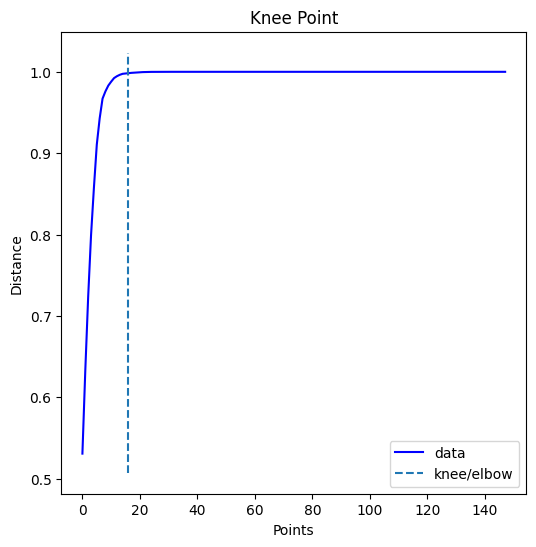

Knee Locator K= 18


In [82]:
from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio = list(var_ratio.values())
components = list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, curve='concave',direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5,5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k=components[knee.knee] if knee.knee is not None else None
print('Knee Locator K=', k)


In [93]:
#reducing the dimensions of the data 
pca_final = PCA(n_components=18,random_state=42).fit(X_res)

reduced = pca_final.fit_transform(X_pca)

In [94]:
#Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
#Fit the model to generate the data
X_res, y_res = smt.fit_resample(reduced,y)

In [95]:
#Training all models 
report_pca = evaluate_models(X_res,y_res,models)

Random Forest
Model performance for Training set
- Accuracy: 0.9839
- F1 score: 0.9840
- Precision: 0.9783
- Recall: 0.9838
-COST: 9390.
--------------------
Model performance for Test set
-Accuracy: 1.0000
-F1 score : 1.0000
- Precision: 1.0000
-Recall: 1.0000
- ROC Auc Score : 1.0000


Decision Tree
Model performance for Training set
- Accuracy: 0.9779
- F1 score: 0.9781
- Precision: 0.9748
- Recall: 0.9779
-COST: 16950.
--------------------
Model performance for Test set
-Accuracy: 1.0000
-F1 score : 1.0000
- Precision: 1.0000
-Recall: 1.0000
- ROC Auc Score : 1.0000


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9652
- F1 score: 0.9656
- Precision: 0.9599
- Recall: 0.9652
-COST: 26220.
--------------------
Model performance for Test set
-Accuracy: 0.9703
-F1 score : 0.9705
- Precision: 0.9656
-Recall: 0.9753
- ROC Auc Score : 0.9704


Logistic Regression
Model performance for Training set
- Accuracy: 0.8871
- F1 score: 0.8784
- Precision: 0.9568
- Recall: 0.88

In [96]:
report_pca

,Model Name,Cost
0,Random Forest,0
1,Decision Tree,0
5,XGBClassifier,4060
6,CatBoosting Classifier,12920
4,K-Neighbors Classifier,52340
2,Gradient Boosting,89450
7,AdaBoost Classifier,217360
3,Logistic Regression,663910


In [98]:
from prettytable import PrettyTable

pt = PrettyTable()
pt.field_names = ["Model","Imputation_method","Total_cost"]
pt.add_row(["XGBClassifier","Simple Imputer-Constant","2950"])
pt.add_row(["XGBClassifier","Mice","3510"])
pt.add_row(["XGBClassifier","Knn-Imputer","4460"])
pt.add_row(["XGBClassifier","Simple Imputer-Mean","4950"])
pt.add_row(["CatBoostClassifier","Median","5760"])
pt.add_row(["Random Forest","PCA","34150"])
print(pt)

+--------------------+-------------------------+------------+
|       Model        |    Imputation_method    | Total_cost |
+--------------------+-------------------------+------------+
|   XGBClassifier    | Simple Imputer-Constant |    2950    |
|   XGBClassifier    |           Mice          |    3510    |
|   XGBClassifier    |       Knn-Imputer       |    4460    |
|   XGBClassifier    |   Simple Imputer-Mean   |    4950    |
| CatBoostClassifier |          Median         |    5760    |
|   Random Forest    |           PCA           |   34150    |
+--------------------+-------------------------+------------+


In [99]:
final_model = XGBClassifier

#Resampling the minority class. The Strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
#Fit the model to generate the data
X_res, y_res = smt.fit_resample(X_const, y)

In [102]:
from xgboost import XGBClassifier

final_model = XGBClassifier(random_state=42)  # or your custom params
final_model.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [103]:
print("Final XGBoost Classifier Accuracy Score(Train):",final_model.score(X_train,y_train))
print("Final XGBoost Classifier Accuracy Score (Test):",accuracy_score(y_pred,y_test))

Final XGBoost Classifier Accuracy Score(Train): 1.0
Final XGBoost Classifier Accuracy Score (Test): 0.9946704067321178


In [104]:
print("Final XGBoost Classifier Cost Metric(Test) :",total_cost(y_test,y_pred))

Final XGBoost Classifier Cost Metric(Test) : 1170


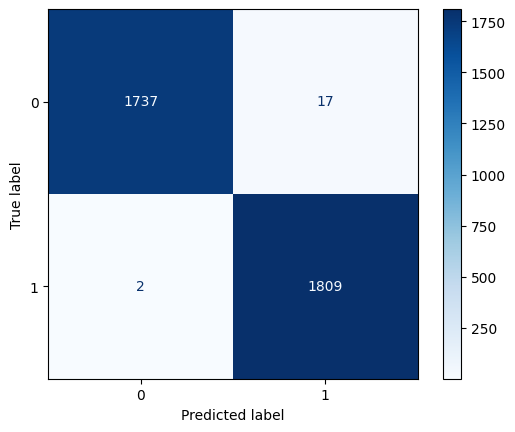

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, final_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.show()
